# What Makes an App Thrive? Analyzing Success Drivers on Google Play

In the dynamically evolving landscape of mobile applications, understanding what drives an app's success is crucial for developers and marketers alike. This project delves into the realm of Google Play, one of the largest platforms for app distribution, to uncover the determinants of app popularity. By examining approximately 10,000 apps, we aim to dissect the intricate tapestry of features that propel apps to high install counts, offering valuable insights for the app development community.

The primary objective is to identify which characteristics significantly influence an app's likelihood of surpassing the 1 million installs mark, classifying these attributes as indicators of a 'successful' app. To achieve this, we employed various machine learning classifiers, including decision trees, random forests, and gradient boosting, with a focus on a pruned decision tree model for its balance of simplicity and predictive power. The analysis hones in on factors such as app size, price, and category, leveraging partial dependence plots to interpret the influence of these features.

Our approach involved meticulous data cleaning, transformation, and exploratory analysis, followed by model training and evaluation. The pruned tree model emerged as the most effective, achieving notable accuracy and recall for the 'High' install category. Preliminary findings suggest that lower-priced and larger-sized apps have a higher success probability, and certain categories like Entertainment and Photography are more conducive to high install numbers. Conversely, categories like Family, Medical, Business, and Tools appear to have a lesser impact on achieving high install counts.

---

Source of data:

https://dq-content.s3.amazonaws.com/350/googleplaystore.csv

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [106]:
android = pd.read_csv('googleplaystore.csv')

## Data Cleaning

In [107]:
android

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [108]:
android.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [109]:
android['Type'].value_counts(dropna=False)

Free    10039
Paid      800
NaN         1
0           1
Name: Type, dtype: int64

In [110]:
android[(android['Type']=='0') | (android['Type'].isna())]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
9148,Command & Conquer: Rivals,FAMILY,NaN,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [111]:
android1 = android.drop(index=[9148, 10472]).copy()

android1

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [112]:
android1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10839 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10839 non-null  object 
 1   Category        10839 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10839 non-null  object 
 4   Size            10839 non-null  object 
 5   Installs        10839 non-null  object 
 6   Type            10839 non-null  object 
 7   Price           10839 non-null  object 
 8   Content Rating  10839 non-null  object 
 9   Genres          10839 non-null  object 
 10  Last Updated    10839 non-null  object 
 11  Current Ver     10831 non-null  object 
 12  Android Ver     10837 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.2+ MB


We will now check for duplicates, and remove them, keeping the newest version (duplicated apps with most reviews).

In [113]:
android1['Reviews'] = android1['Reviews'].astype(int)

In [168]:
android2 = android1.sort_values(['App', 'Reviews']).drop_duplicates(['App'], keep='last').copy()

We will drop the columns we will not need (Current ver, Android ver, Last updated).

In [169]:
android2 = android2.drop(['Current Ver', 'Android Ver', 'Last Updated'], axis=1)

Next we will clean the remaining columns.

In [170]:
android2['Category'].value_counts(dropna=False)

FAMILY                 1877
GAME                    945
TOOLS                   829
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         376
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     222
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  170
VIDEO_PLAYERS           164
MAPS_AND_NAVIGATION     131
FOOD_AND_DRINK          112
EDUCATION               105
ENTERTAINMENT            86
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       84
WEATHER                  79
HOUSE_AND_HOME           73
EVENTS                   64
ART_AND_DESIGN           61
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: Category, dtype: int64

In [171]:
android2['Genres'].value_counts(dropna=False)

Tools                                  828
Entertainment                          561
Education                              510
Business                               420
Medical                                395
                                      ... 
Health & Fitness;Action & Adventure      1
Art & Design;Pretend Play                1
Travel & Local;Action & Adventure        1
Trivia;Education                         1
Books & Reference;Creativity             1
Name: Genres, Length: 118, dtype: int64

Since Genres and Category features are quite similar, we will drop the more dispersed Genres column.

In [172]:
android2 = android2.drop(['Genres'], axis=1)

In [173]:
android2['Rating'].value_counts(dropna=False)

NaN    1462
4.3     895
4.4     894
4.5     851
4.2     812
4.6     684
4.1     623
4.0     513
4.7     439
3.9     359
3.8     286
5.0     271
3.7     224
4.8     220
3.6     167
3.5     156
3.4     126
3.3     100
4.9      85
3.0      81
3.1      69
3.2      63
2.9      45
2.8      40
2.7      23
2.6      23
2.3      20
2.5      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      11
1.8       8
1.7       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [95]:
import matplotlib.style as style

style.use('fivethirtyeight')

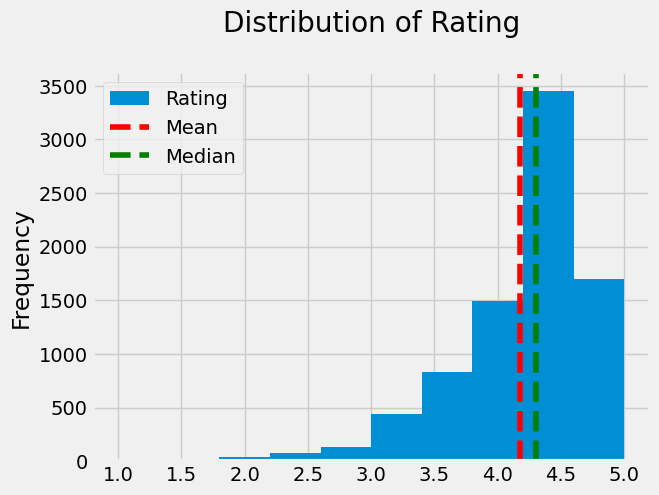

In [174]:
android2['Rating'].plot.hist()
plt.axvline(android2['Rating'].mean(), c='r', ls='--', label='Mean')
plt.axvline(android2['Rating'].median(), c='g', ls='--', label='Median')
plt.title('Distribution of Rating'+'\n')
plt.legend()
plt.show()

Since Rating won't be used as a feature for regression, we will impute median for missing values.

In [175]:
android2.loc[android2['Rating'].isna(), 'Rating'] = android2['Rating'].median()

android2['Rating'].value_counts(dropna=False)

4.3    2357
4.4     894
4.5     851
4.2     812
4.6     684
4.1     623
4.0     513
4.7     439
3.9     359
3.8     286
5.0     271
3.7     224
4.8     220
3.6     167
3.5     156
3.4     126
3.3     100
4.9      85
3.0      81
3.1      69
3.2      63
2.9      45
2.8      40
2.7      23
2.6      23
2.3      20
2.5      20
2.4      19
1.0      16
2.2      14
2.0      12
1.9      11
1.8       8
1.7       8
2.1       8
1.6       4
1.4       3
1.5       3
1.2       1
Name: Rating, dtype: int64

In [177]:
android2['Size'].value_counts(dropna=False)

Varies with device    1227
11M                    182
12M                    181
13M                    177
14M                    177
                      ... 
458k                     1
245k                     1
775k                     1
28k                      1
549k                     1
Name: Size, Length: 461, dtype: int64

We will transform all data to kilobytes and change type to float.

In [178]:
android2_size_m = android2[android2['Size'].str.contains('M')].copy()
android2_size_k = android2[android2['Size'].str.contains('k')].copy()
android2_size_rest = android2[~((android2['Size'].str.contains('M')) | (android2['Size'].str.contains('k')))].copy()

In [179]:
android2_size_m['Size'] = android2_size_m['Size'].str.replace('M', '').astype(float)*1024
android2_size_k['Size'] = android2_size_k['Size'].str.replace('k', '').astype(float)
android2_size_rest['Size'].value_counts(dropna=False)

Varies with device    1227
Name: Size, dtype: int64

In [180]:
android2_size_rest['Size'] = np.nan

In [181]:
android3 = pd.concat([android2_size_m, android2_size_k, android2_size_rest], axis=0)
android3

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating
8884,"""i DT"" Fútbol. Todos Somos Técnicos.",SPORTS,4.3,27,3686.4,500+,Free,0,Everyone
8532,+Download 4 Instagram Twitter,SOCIAL,4.5,40467,22528.0,"1,000,000+",Free,0,Everyone
324,- Free Comics - Comic Apps,COMICS,3.5,115,9318.4,"10,000+",Free,0,Mature 17+
4636,/u/app,COMMUNICATION,4.7,573,54272.0,"10,000+",Free,0,Mature 17+
5940,058.ba,NEWS_AND_MAGAZINES,4.4,27,14336.0,100+,Free,0,Everyone
...,...,...,...,...,...,...,...,...,...
4811,yHomework - Math Solver,FAMILY,4.2,50771,NaN,"1,000,000+",Free,0,Everyone
2758,zulily - Shop Daily Deals in Fashion and Home,SHOPPING,4.5,28560,NaN,"1,000,000+",Free,0,Everyone
3960,► MultiCraft ― Free Miner! 👍,GAME,4.3,1305050,NaN,"50,000,000+",Free,0,Everyone 10+
3824,乗換NAVITIME Timetable & Route Search in Japan T...,MAPS_AND_NAVIGATION,4.4,50459,NaN,"5,000,000+",Free,0,Everyone


Exploring the distribution of Size.

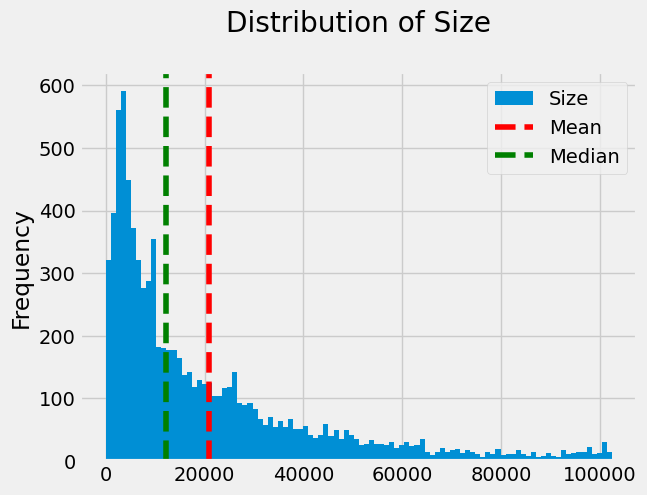

In [182]:
android3['Size'].plot.hist(bins=100)
plt.axvline(android3['Size'].mean(), c='r', ls='--', label='Mean')
plt.axvline(android3['Size'].median(), c='g', ls='--', label='Median')
plt.title('Distribution of Size'+'\n')
plt.legend()
plt.show()

We will impute missing values for Size with KNN imputer after cleaning the data.

In [183]:
android3['Installs'].value_counts(dropna=False)

1,000,000+        1417
100,000+          1113
10,000+           1030
10,000,000+        937
1,000+             887
100+               709
5,000,000+         607
500,000+           504
50,000+            469
5,000+             468
10+                385
500+               328
50,000,000+        204
50+                204
100,000,000+       189
5+                  82
1+                  67
500,000,000+        24
1,000,000,000+      20
0+                  14
Name: Installs, dtype: int64

We will transform the numbers to integer format.

In [184]:
android3['Installs'] = android3['Installs'].str.replace('+', '').str.replace(',', '').astype(int)

/var/folders/xw/3pj1fbx137g_tcv5h8ylvr2c0000gn/T/ipykernel_14205/575610340.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  android3['Installs'] = android3['Installs'].str.replace('+', '').str.replace(',', '').astype(int)


In [185]:
android3['Type'].value_counts(dropna=False)

Free    8904
Paid     754
Name: Type, dtype: int64

In [186]:
android3['Price'].value_counts(dropna=False)

0          8904
$0.99       145
$2.99       124
$1.99        73
$4.99        70
           ... 
$400.00       1
$1.26         1
$15.46        1
$74.99        1
$2.50         1
Name: Price, Length: 92, dtype: int64

We will drop Type column, since the Price column already contains that information.

In [187]:
android3.loc[android3['Price']!='0', 'Price'] = android3[android3['Price']!='0']['Price'].str[1:]

android3['Price'] = android3['Price'].astype(float)

In [188]:
android3 = android3.drop(['Type'], axis=1)

In [189]:
android3['Content Rating'].value_counts(dropna=False)

Everyone           7903
Teen               1036
Mature 17+          393
Everyone 10+        321
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

We can drop 2 unrated apps.

In [190]:
android4 = android3[android3['Content Rating'] != 'Unrated'].copy()

In [191]:
android4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9656 entries, 8884 to 9222
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9656 non-null   object 
 1   Category        9656 non-null   object 
 2   Rating          9656 non-null   float64
 3   Reviews         9656 non-null   int64  
 4   Size            8429 non-null   float64
 5   Installs        9656 non-null   int64  
 6   Price           9656 non-null   float64
 7   Content Rating  9656 non-null   object 
dtypes: float64(3), int64(2), object(3)
memory usage: 678.9+ KB


To impute missing values for Size, first we will exclude to-be response variables (Reviews, Installs) and App, and convert Category and Content Rating with one-hot encoding.

In [234]:
android_y = android4[['Reviews', 'Installs']].copy()
android_app = android4[['App']].copy()

In [193]:
android5 = pd.get_dummies(android4[['Category', 'Rating', 'Size', 'Price', 'Content Rating']], drop_first=True)
android5

,Rating,Size,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
8884,4.3,3686.4,0.0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,1,0,0,0
8532,4.5,22528.0,0.0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
324,3.5,9318.4,0.0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
4636,4.7,54272.0,0.0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
5940,4.4,14336.0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4811,4.2,NaN,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
2758,4.5,NaN,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3960,4.3,NaN,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3824,4.4,NaN,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [194]:
from sklearn.impute import KNNImputer

In [195]:
imp_knn = KNNImputer(missing_values=np.nan)

android_X = pd.DataFrame(imp_knn.fit_transform(android5), columns=android5.columns)

android_X

,Rating,Size,Price,Category_AUTO_AND_VEHICLES,Category_BEAUTY,Category_BOOKS_AND_REFERENCE,Category_BUSINESS,Category_COMICS,Category_COMMUNICATION,Category_DATING,...,Category_SOCIAL,Category_SPORTS,Category_TOOLS,Category_TRAVEL_AND_LOCAL,Category_VIDEO_PLAYERS,Category_WEATHER,Content Rating_Everyone,Content Rating_Everyone 10+,Content Rating_Mature 17+,Content Rating_Teen
0,4.3,3686.40,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,4.5,22528.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,3.5,9318.40,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,4.7,54272.00,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,4.4,14336.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9651,4.2,28528.64,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9652,4.5,25067.52,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9653,4.3,53248.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9654,4.4,22937.60,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [196]:
android_X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Rating                        9656 non-null   float64
 1   Size                          9656 non-null   float64
 2   Price                         9656 non-null   float64
 3   Category_AUTO_AND_VEHICLES    9656 non-null   float64
 4   Category_BEAUTY               9656 non-null   float64
 5   Category_BOOKS_AND_REFERENCE  9656 non-null   float64
 6   Category_BUSINESS             9656 non-null   float64
 7   Category_COMICS               9656 non-null   float64
 8   Category_COMMUNICATION        9656 non-null   float64
 9   Category_DATING               9656 non-null   float64
 10  Category_EDUCATION            9656 non-null   float64
 11  Category_ENTERTAINMENT        9656 non-null   float64
 12  Category_EVENTS               9656 non-null   float64
 13  Cat

In [235]:
android_y

,Reviews,Installs
8884,27,500
8532,40467,1000000
324,115,10000
4636,573,10000
5940,27,100
...,...,...
4811,50771,1000000
2758,28560,1000000
3960,1305050,50000000
3824,50459,5000000


In [236]:
android_y['Installs'].value_counts()

1000000       1417
100000        1113
10000         1030
10000000       937
1000           887
100            709
5000000        607
500000         504
5000           468
50000          468
10             385
500            327
50000000       204
50             204
100000000      189
5               82
1               67
500000000       24
1000000000      20
0               14
Name: Installs, dtype: int64

We will replace these values with ordinal levels:
- Low: For apps with installs less than 100,000.
- Medium: For apps with installs more than 100,000 and up to 1,000,000.
- High: For apps with installs above 1,000,000.

In [237]:
print(sum(android_y['Installs'] < 100000),
      sum((android_y['Installs'] >= 100000) & (android_y['Installs'] < 1000000)),
      sum((android_y['Installs'] >= 1000000)))

4641 1617 3398


Each category has a sufficient number of apps.

In [238]:
android_y['Installs_cat'] = 'Low'

android_y.loc[(android_y['Installs'] >= 100000), 'Installs_cat'] = 'Medium'
android_y.loc[(android_y['Installs'] >= 1000000), 'Installs_cat'] = 'High'

In [239]:
android_y

,Reviews,Installs,Installs_cat
8884,27,500,Low
8532,40467,1000000,High
324,115,10000,Low
4636,573,10000,Low
5940,27,100,Low
...,...,...,...
4811,50771,1000000,High
2758,28560,1000000,High
3960,1305050,50000000,High
3824,50459,5000000,High


In [240]:
android_y['Installs_cat'].value_counts()

Low       4641
High      3398
Medium    1617
Name: Installs_cat, dtype: int64

## Fitting the Models

### Decision Tree Classifier

In [264]:
from sklearn.tree import (DecisionTreeClassifier as DTC,
                          plot_tree,
                          export_text)
from sklearn.metrics import (accuracy_score,
                             ConfusionMatrixDisplay)
import sklearn.model_selection as skm

In [330]:
X = android_X.drop(['Rating'], axis=1)

feature_names = list(X.columns)
X = np.asarray(X)

In [243]:
y = android_y['Installs_cat']

In [331]:
X_train, X_test, y_train, y_test = skm.train_test_split(X, y,
                                   test_size=0.3,
                                   random_state=220)

In [268]:
clf = DTC(criterion='entropy',
          max_depth=5,
          random_state=220,
          min_samples_split=50)

clf.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=50,
                       random_state=220)

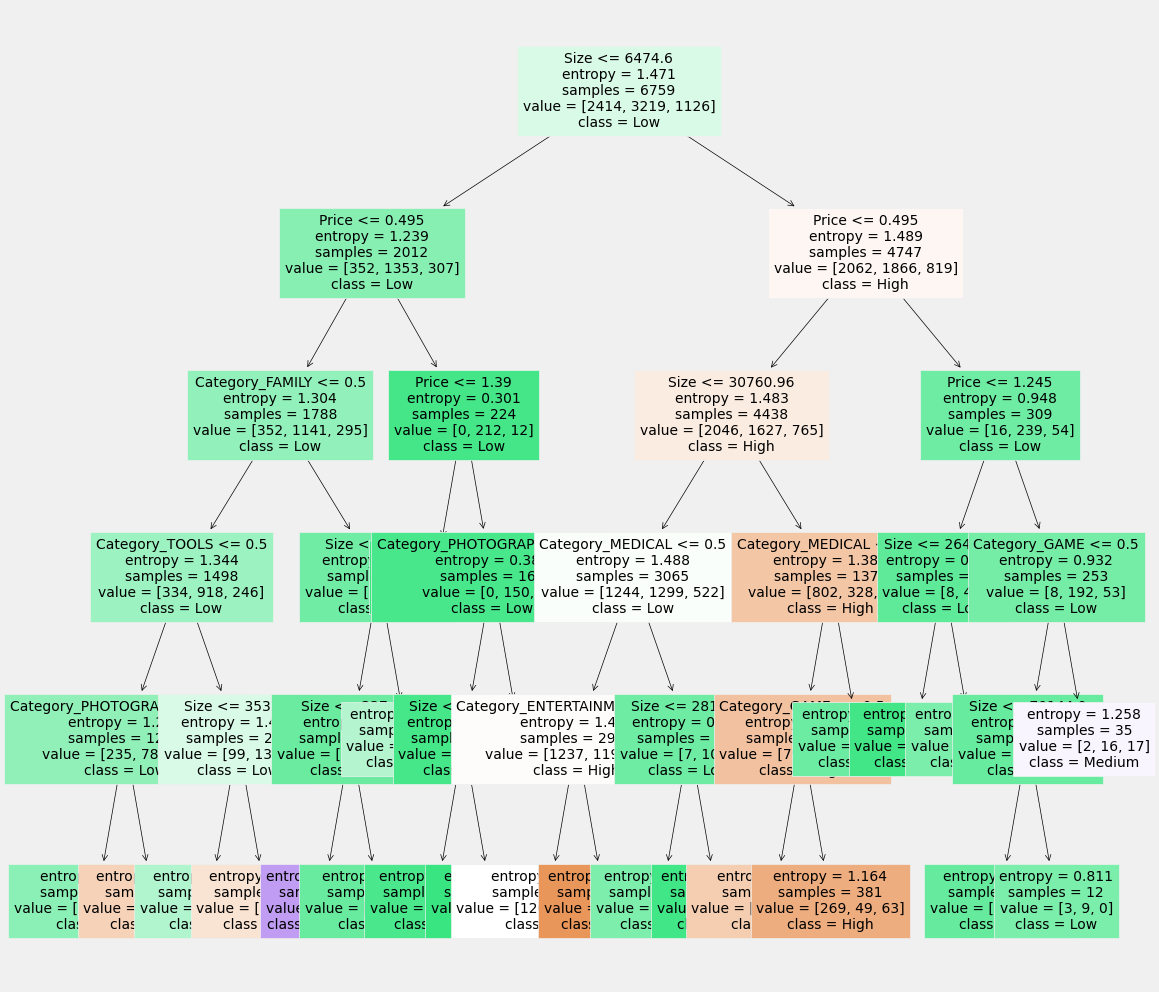

In [269]:
class_names =  clf.classes_

plt.figure(figsize=(12,12))
plot_tree(clf, feature_names=feature_names, filled=True,
                 class_names =  class_names, fontsize=10)
plt.show()

Size and price look like the most important features. 

In [258]:
accuracy_score(y_test, clf.predict(X_test))

0.5529858474283742

### Pruned Tree

In [287]:
clf = DTC(criterion='entropy', random_state=220)
clf.fit(X_train, y_train)

# Extracting cost-complexity values
ccp_path = clf.cost_complexity_pruning_path(X_train, y_train)

kfold = skm.KFold(5,
                  random_state=220,
                  shuffle=True)

grid_pr = skm.GridSearchCV(clf,
                        {'ccp_alpha': ccp_path.ccp_alphas},
                        refit=True,
                        cv=kfold,
                        scoring='accuracy')

grid_pr.fit(X_train, y_train)
accuracy_score(y_test, grid_pr.best_estimator_.predict(X_test))

0.619261304798067

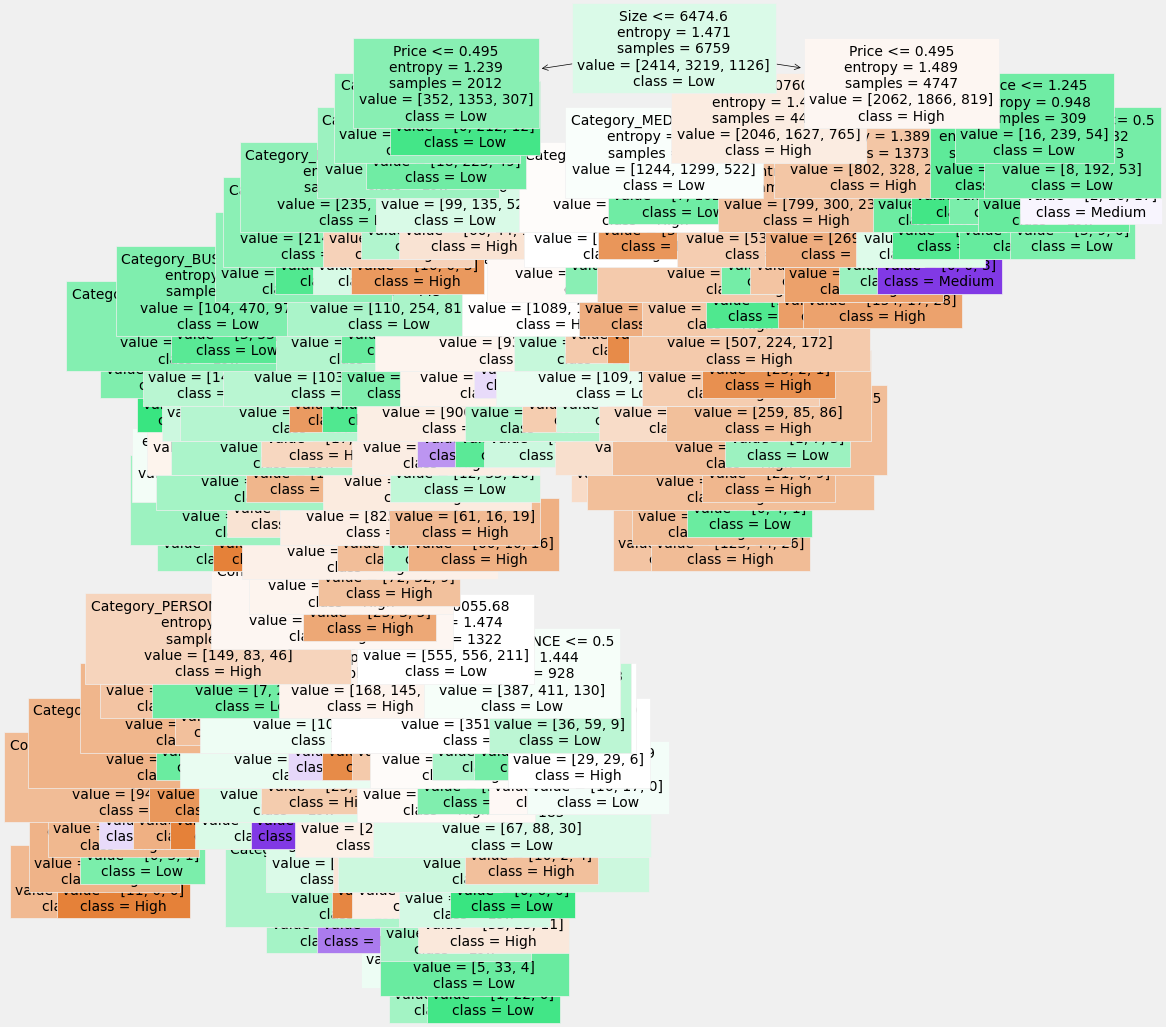

In [288]:
plt.figure(figsize=(12,12))
plot_tree(grid_pr.best_estimator_,
          feature_names=feature_names,
          filled=True,
          class_names=class_names,
          fontsize=10)
plt.show()

In [289]:
grid_pr.best_estimator_.tree_.n_leaves

95

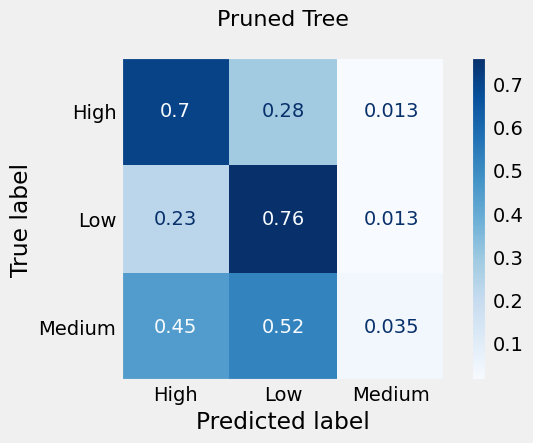

In [294]:
fig, ax = plt.subplots(figsize=(6, 4))
display = ConfusionMatrixDisplay.from_predictions(y_test,
                                                  grid_pr.best_estimator_.predict(X_test),
                                                  ax=ax,
                                                  display_labels=class_names,
                                                  cmap=plt.cm.Blues,
                                                  normalize='true')
ax.grid(visible=None)
plt.title('Pruned Tree'+'\n', size=16)
plt.show()

Pruned tree with 95 leaves shows good predictive ability for Low and High classes and moderate accuracy of 0.62.

### Random Forests

We will fit both bagged model with all features and random forest with square root of max features, and compare their oob scores for different number of estimators.

In [276]:
from sklearn.ensemble import RandomForestClassifier as RF

In [277]:
bag_acc = []
rf_acc = []

for n in range(100, 2001, 100):
    bag = RF(max_features=None, n_estimators=n, random_state=220, oob_score=True, warm_start=True)
    bag.fit(X_train, y_train)
    bag_acc.append(bag.oob_score_)
    
    rf = RF(max_features='sqrt', n_estimators=n, random_state=220, oob_score=True, warm_start=True)
    rf.fit(X_train, y_train)
    rf_acc.append(rf.oob_score_)

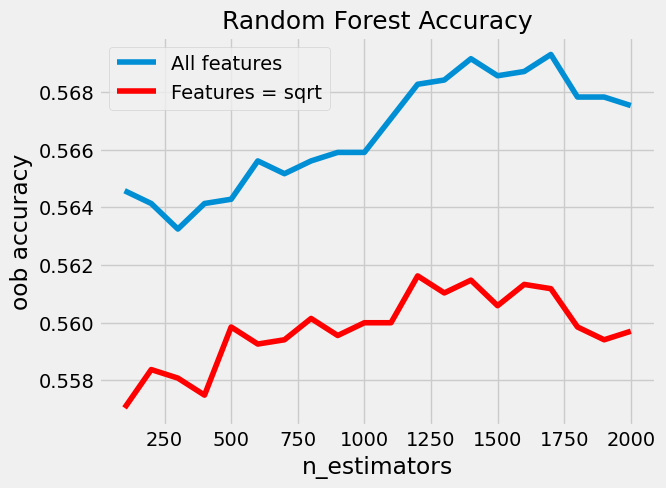

In [282]:
plt.plot(range(100, 2001, 100), bag_acc, linewidth=4, label='All features')
plt.plot(range(100, 2001, 100), rf_acc, linewidth=4, c='r', label='Features = sqrt')

plt.xlabel('n_estimators')
plt.ylabel('oob accuracy')

plt.title('Random Forest Accuracy', size=18)
plt.legend()

plt.show()

In [291]:
np.argmax(bag_acc)

16

In [292]:
bag = RF(max_features=None, n_estimators=1700, random_state=220, warm_start=True)
bag.fit(X_train, y_train)

accuracy_score(y_test, bag.predict(X_test))

0.5705902657921988

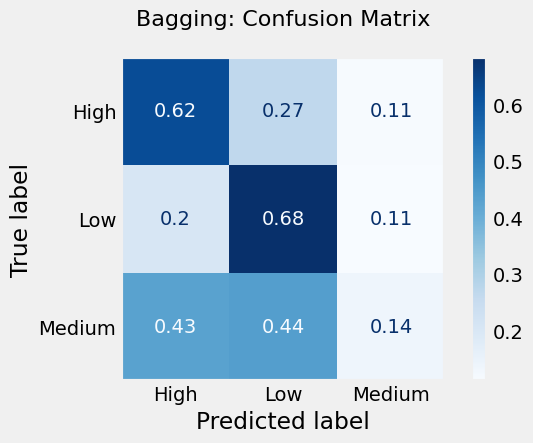

In [293]:
fig, ax = plt.subplots(figsize=(6, 4))
display = ConfusionMatrixDisplay.from_predictions(y_test,
                                                  bag.predict(X_test),
                                                  ax=ax,
                                                  display_labels=class_names,
                                                  cmap=plt.cm.Blues,
                                                  normalize='true')
ax.grid(visible=None)
plt.title('Bagging'+'\n', size=16)
plt.show()

Random Forest shows inferior results compared to pruned tree.

### Gradient Boosting Classifier

In [283]:
from sklearn.ensemble import GradientBoostingClassifier as GBC

In [284]:
grid_params = {'n_estimators' : [500, 1500, 3000],
               'learning_rate' : [0.1, 0.01, 0.001],
               'max_depth' : [1, 2, 3]}

gbc = GBC(random_state=220)

grid = skm.GridSearchCV(gbc,
                        grid_params,
                        refit=True,
                        cv=kfold,
                        scoring='accuracy',
                        n_jobs=-1)

grid.fit(X_train, y_train)

accuracy_score(y_test, grid.best_estimator_.predict(X_test))

0.6265101829478771

In [285]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 500}

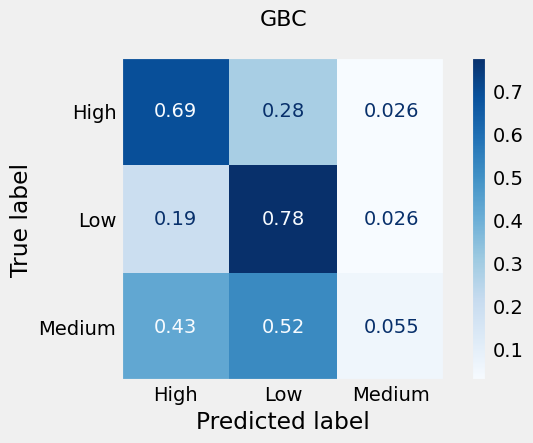

In [295]:
fig, ax = plt.subplots(figsize=(6, 4))
display = ConfusionMatrixDisplay.from_predictions(y_test,
                                                  grid.best_estimator_.predict(X_test),
                                                  ax=ax,
                                                  display_labels=class_names,
                                                  cmap=plt.cm.Blues,
                                                  normalize='true')
ax.grid(visible=None)
plt.title('GBC'+'\n', size=16)
plt.show()

GBC shows slightly better accuracy at the expense of slightly worse recall for High class.

### KNN Classifier

For comparison we will also fit KNN classifier with cross-validated hyperparameters.

In [297]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [299]:
scaler = StandardScaler(with_mean=True,  with_std=True)
knn = KNeighborsClassifier()

pipe = Pipeline(steps=[('scaler', scaler),
                       ('knn', knn)])


param_grid = {'knn__n_neighbors' : range(3, 20),
              'knn__weights' : ['uniform', 'distance'],
              'knn__algorithm' : ['ball_tree', 'kd_tree', 'brute'],
              'knn__p' : [1, 2]}

grid = skm.GridSearchCV(pipe,
                        param_grid,
                        cv=kfold,
                        scoring='accuracy')

grid.fit(X_train, y_train)

grid.best_params_

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:821: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 810, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 266, in __call__
    return self._score(partial(_cached_call, None), estimator, X, y_true, **_kwargs)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/rinatkam

/Users/rinatkamalov/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_search.py:979: UserWarning: One or more of the test scores are non-finite: [0.55244888 0.54771307 0.55215313 0.54815686 0.57020364 0.55289168
 0.56902021 0.55333536 0.57035212 0.55466726 0.57005626 0.55496301
 0.57316189 0.55452032 0.57301363 0.55511215 0.58263121 0.5568874
 0.58307445 0.55851473 0.58854903 0.55851539 0.58662606 0.55866299
 0.58958584 0.56088291 0.5886975  0.56088269 0.58707039 0.56088269
 0.58544274 0.56117833 0.59239682 0.56339847 0.59210096 0.56354596
 0.59565159 0.56428593 0.59343243 0.56398986 0.59668523 0.56517362
 0.59239463 0.56487743 0.59816529 0.5645819  0.59698196 0.56502569
 0.59964523 0.56591348 0.59609351 0.56591326 0.5962421  0.56561762
 0.59624232 0.56620912 0.59831256 0.56561762 0.59357839 0.56635738
 0.59416967 0.56620934 0.59343003 0.56665334 0.59683283 0.56591403
 0.59875602 0.56620989 0.55230084 0.54712113 0.55200509 0.54771296
 0.56990778 0.55215192 0.56857642 0

{'knn__algorithm': 'ball_tree',
 'knn__n_neighbors': 15,
 'knn__p': 1,
 'knn__weights': 'uniform'}

In [301]:
accuracy_score(y_test, grid.best_estimator_.predict(X_test))

0.5892302381774249

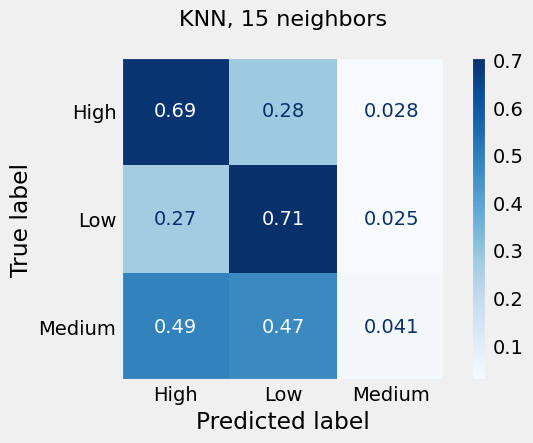

In [302]:
fig, ax = plt.subplots(figsize=(6, 4))
display = ConfusionMatrixDisplay.from_predictions(y_test,
                                                  grid.best_estimator_.predict(X_test),
                                                  ax=ax,
                                                  display_labels=class_names,
                                                  cmap=plt.cm.Blues,
                                                  normalize='true')
ax.grid(visible=None)
plt.title('KNN, 15 neighbors'+'\n', size=16)
plt.show()

Pruned tree shows overall best results in terms of accuracy (0.62) and recall for High class (0.7).

## Evaluating Feature Importance

In [332]:
grid_pr.best_estimator_.fit(X, y)

DecisionTreeClassifier(ccp_alpha=0.0009546313843400867, criterion='entropy',
                       random_state=220)

In [333]:
feature_imp = pd.DataFrame(
    {'importance': grid_pr.best_estimator_.feature_importances_},
    index=feature_names)
feature_imp.sort_values(by='importance', ascending=False).head(10)

,importance
Size,0.415658
Price,0.182092
Category_MEDICAL,0.067860
Category_BUSINESS,0.039872
Category_FAMILY,0.029364
Category_PHOTOGRAPHY,0.029153
Category_TOOLS,0.028861
Category_ENTERTAINMENT,0.022863
Category_GAME,0.018408
Category_PERSONALIZATION,0.018246


We will make partial dependence plots to assess the effect of top-8 features on the probabilities of High class.

In [327]:
pd.DataFrame(feature_names)

,0
0,Size
1,Price
2,Category_AUTO_AND_VEHICLES
3,Category_BEAUTY
4,Category_BOOKS_AND_REFERENCE
5,Category_BUSINESS
6,Category_COMICS
7,Category_COMMUNICATION
8,Category_DATING
9,Category_EDUCATION


In [307]:
from sklearn.inspection import PartialDependenceDisplay

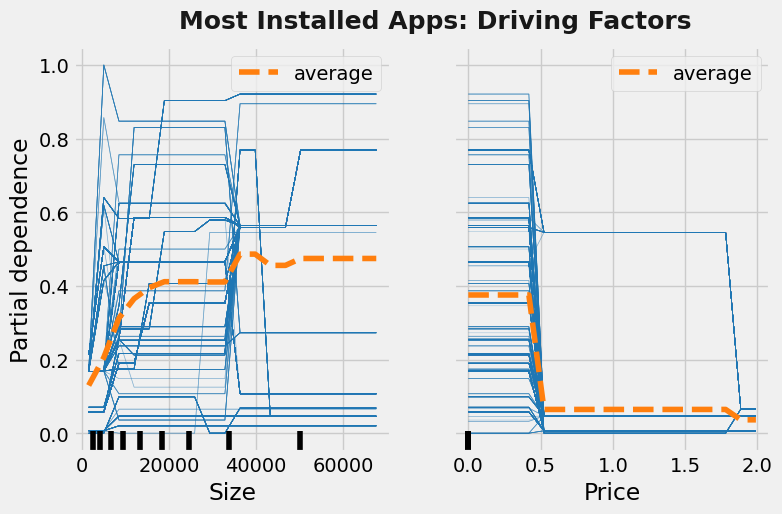

In [362]:
features=[0, 1]

fig, ax = plt.subplots(figsize=(8, 5))
display = PartialDependenceDisplay.from_estimator(
            grid_pr.best_estimator_,
            X,
            features=features,
            kind='both',
            target='High',
            grid_resolution=20,
            ax=ax)
for ax, feature_idx in zip(display.axes_.ravel(), features):
    ax.set_xlabel(feature_names[feature_idx])

ax.text(x=-2, y=1.1, s='Most Installed Apps: Driving Factors', size=18, weight='bold', alpha=0.9)

plt.show()

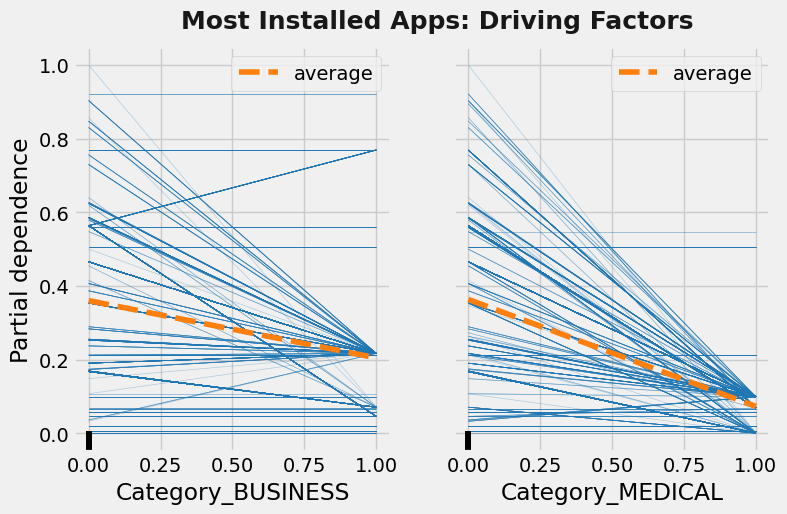

In [360]:
features = [5, 21]

fig, ax = plt.subplots(figsize=(8, 5))
display = PartialDependenceDisplay.from_estimator(
            grid_pr.best_estimator_,
            X,
            features=features,
            kind='both',
            target='High',
            grid_resolution=20,
            ax=ax)
for ax, feature_idx in zip(display.axes_.ravel(), features):
    ax.set_xlabel(feature_names[feature_idx])

ax.text(x=-1, y=1.1, s='Most Installed Apps: Driving Factors', size=18, weight='bold', alpha=0.9)

plt.show()

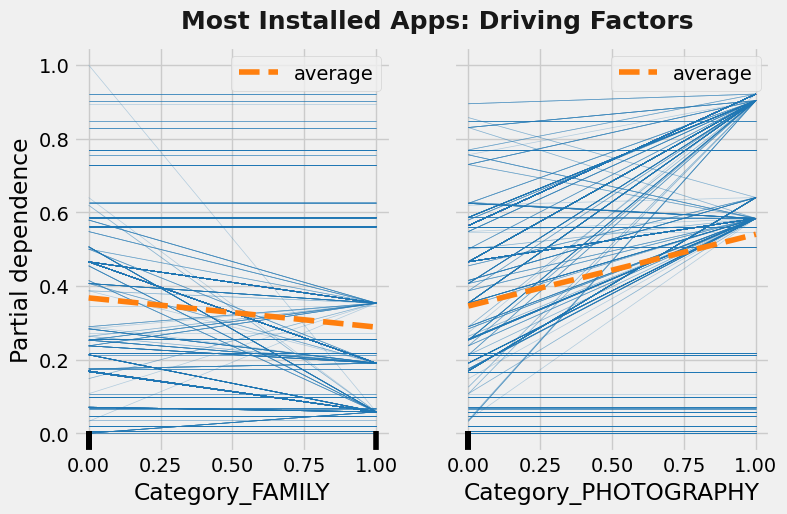

In [357]:
features = [12, 25]

fig, ax = plt.subplots(figsize=(8, 5))
display = PartialDependenceDisplay.from_estimator(
            grid_pr.best_estimator_,
            X,
            features=features,
            kind='both',
            target='High',
            grid_resolution=20,
            ax=ax)
for ax, feature_idx in zip(display.axes_.ravel(), features):
    ax.set_xlabel(feature_names[feature_idx])

ax.text(x=-1, y=1.1, s='Most Installed Apps: Driving Factors', size=18, weight='bold', alpha=0.9)

plt.show()

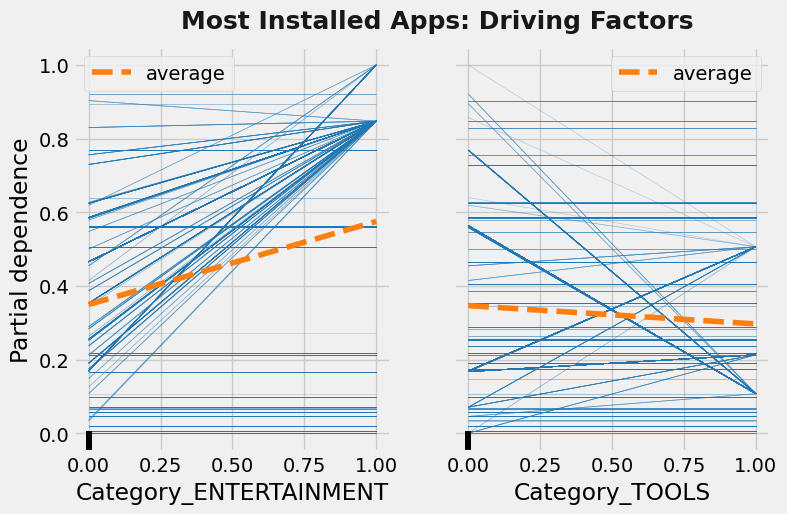

In [363]:
features = [10, 30]

fig, ax = plt.subplots(figsize=(8, 5))
display = PartialDependenceDisplay.from_estimator(
            grid_pr.best_estimator_,
            X,
            features=features,
            kind='both',
            target='High',
            grid_resolution=20,
            ax=ax)
for ax, feature_idx in zip(display.axes_.ravel(), features):
    ax.set_xlabel(feature_names[feature_idx])

ax.text(x=-1, y=1.1, s='Most Installed Apps: Driving Factors', size=18, weight='bold', alpha=0.9)

plt.show()

Having explored the partial dependence plots from our best model (pruned tree), we can conclude that probability of having a successful app on Google Play with over 1M installs is higher for apps that cost less than $0.5 and are bigger in size (probably implying more advanced functionality). Developing an app in such category as family, medical, business, or tools negatively impact the chances for success, while entertainment or photography apps are more likely to be installed.

# Conclusion

This project set out with the goal of identifying key determinants of app success on Google Play, defined by surpassing 1 million installs. Employing a range of machine learning classifiers, we focused our analysis on a pruned decision tree model for its optimal balance of simplicity and predictive accuracy.

Our analysis revealed that the cost and size of an app are significant predictors of its success. Apps priced below $0.5 and those with larger sizes are more likely to achieve higher install counts. Additionally, the app's category plays a pivotal role, with categories like Entertainment and Photography being more favorable for success, whereas Family, Medical, Business, and Tools categories exhibit a lesser likelihood of reaching high install numbers.

The pruned decision tree model, chosen for its interpretability, provided a clear view of feature importance and their impact on app popularity. While this approach offered valuable insights, we acknowledge its inherent limitations in capturing the full complexity of app market dynamics.

Future research might explore the reasons behind certain categories negatively impacting app success, possibly delving into market saturation or user preference trends. Moreover, integrating user review and rating analysis could offer a more nuanced understanding of user engagement and preferences.

These findings can guide app developers and marketers in strategizing app development and promotion, particularly emphasizing the importance of competitive pricing, rich functionality, and strategic category selection.

In conclusion, this project underscores the multifaceted nature of app success on Google Play. The insights gleaned not only contribute to a deeper understanding of the app market but also offer practical guidance for those aiming to navigate this competitive landscape.